In [20]:
import tweepy as tw
import pandas as pd
import numpy as np
import json
import string
from textblob import TextBlob
import re
import collections
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WordPunctTokenizer

In [21]:
df = pd.read_csv('tweets.csv')

In [22]:
df.head()

,Unnamed: 0,User_name,tweets,letters_preprocess,Polarity,Label
0,0,Drewboy14,RT @esquire: #BlackPanther made him an overnig...,139,0.03125,1
1,1,Demarcus_Red,RT @getFANDOM: #WakandaForever blew everything...,105,0.00000,4
2,2,iBE_ONLYME,RT @heroichollywood: We NEED Shuri &amp; Peter...,100,0.00000,4
3,3,hiroshi00279644,RT @heroichollywood: Retweet if you’re hyped f...,100,0.00000,4
4,4,YPinedodelarosa,RT @marvel_shots: ‘We Know What You Whisper’ \...,85,0.00000,4


In [23]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,User_name,tweets,letters_preprocess,Polarity,Label
0,Drewboy14,RT @esquire: #BlackPanther made him an overnig...,139,0.03125,1
1,Demarcus_Red,RT @getFANDOM: #WakandaForever blew everything...,105,0.00000,4
2,iBE_ONLYME,RT @heroichollywood: We NEED Shuri &amp; Peter...,100,0.00000,4
3,hiroshi00279644,RT @heroichollywood: Retweet if you’re hyped f...,100,0.00000,4
4,YPinedodelarosa,RT @marvel_shots: ‘We Know What You Whisper’ \...,85,0.00000,4


In [24]:
def count_letter(text):
    letter = len(text)
    return letter

def clean_txt(text):
    text = re.sub('(@[\w\S]+)','',text)  #removes handle from message
    text = re.sub('(http://\S+)', '',text)  #removes link from message
    text = re.sub(r'#', '', text) #removes hashtags
    text = re.sub(r'RT[\s]+', '', text) #removes RT
    return text

def process_txt(text):
    no_punc = [char for char in text if char not in string.punctuation]  #Removing the punctuations from the message
    no_punc = ''.join(no_punc)
    clean_words = [word.lower() for word in no_punc.split() if word.lower() not in stopwords.words('english')]  #Removing the stopwords from the message
    lemmet = WordNetLemmatizer()
    lemmet_words = [lemmet.lemmatize(word1) for word1 in clean_words] #Lemmeting the words in the message
    for i in lemmet_words:
        unique_words.add(i)
        words_list.append(i)
    return (" ".join(lemmet_words)).strip()

In [25]:
unique_words = set()
words_list = []
df['text'] = df['tweets'].apply(clean_txt)

In [26]:
df['letter_postprocess'] = df['text'].apply(count_letter)

In [27]:
df.head()

,User_name,tweets,letters_preprocess,Polarity,Label,text,letter_postprocess
0,Drewboy14,RT @esquire: #BlackPanther made him an overnig...,139,0.03125,1,BlackPanther made him an overnight celebrity. ...,124
1,Demarcus_Red,RT @getFANDOM: #WakandaForever blew everything...,105,0.00000,4,WakandaForever blew everything else out of the...,89
2,iBE_ONLYME,RT @heroichollywood: We NEED Shuri &amp; Peter...,100,0.00000,4,We NEED Shuri &amp; Peter to meet soon. Wakand...,78
3,hiroshi00279644,RT @heroichollywood: Retweet if you’re hyped f...,100,0.00000,4,Retweet if you’re hyped for Iron Heart! Wakand...,78
4,YPinedodelarosa,RT @marvel_shots: ‘We Know What You Whisper’ \...,85,0.00000,4,‘We Know What You Whisper’ \nWakandaForever ht...,66


In [28]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [29]:
df['Polarity'] = df['text'].apply(getPolarity)

In [30]:
df.head()

,User_name,tweets,letters_preprocess,Polarity,Label,text,letter_postprocess
0,Drewboy14,RT @esquire: #BlackPanther made him an overnig...,139,0.03125,1,BlackPanther made him an overnight celebrity. ...,124
1,Demarcus_Red,RT @getFANDOM: #WakandaForever blew everything...,105,0.00000,4,WakandaForever blew everything else out of the...,89
2,iBE_ONLYME,RT @heroichollywood: We NEED Shuri &amp; Peter...,100,0.00000,4,We NEED Shuri &amp; Peter to meet soon. Wakand...,78
3,hiroshi00279644,RT @heroichollywood: Retweet if you’re hyped f...,100,0.00000,4,Retweet if you’re hyped for Iron Heart! Wakand...,78
4,YPinedodelarosa,RT @marvel_shots: ‘We Know What You Whisper’ \...,85,0.00000,4,‘We Know What You Whisper’ \nWakandaForever ht...,66


In [31]:
df['Label'].value_counts()

4    4739
1    3596
0    1665
Name: Label, dtype: int64

In [32]:
df1 = df[df["Label"] != 4]

In [33]:
df1['processed_text'] = df1['text'].apply(process_txt)

C:\Users\nimit\AppData\Local\Temp\ipykernel_4468\1317610720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['processed_text'] = df1['text'].apply(process_txt)


In [34]:
reviews = np.array(df1['processed_text'])
sentiments = np.array(df1['Label'])

In [35]:
# build train and test datasets
test_reviews = reviews[:int(round(df1.shape[0]*0.03,0))]
test_sentiments = sentiments[:int(round(df1.shape[0]*0.03,0))]
train_reviews = reviews[int(round(df1.shape[0]*0.03,0)):]
train_sentiments = sentiments[int(round(df1.shape[0]*0.03,0)):]

In [39]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# build BOW features on train reviews
cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1,2))
cv_train_features = cv.fit_transform(train_reviews)

# build TFIDF features on train reviews
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0, ngram_range=(1,2),sublinear_tf=True)
tv_train_features = tv.fit_transform(train_reviews)

In [40]:
# transform test reviews into features
cv_test_features = cv.transform(test_reviews)
tv_test_features = tv.transform(test_reviews)

In [41]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)
print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)

BOW model:> Train features shape: (5103, 21669)  Test features shape: (158, 21669)
TFIDF model:> Train features shape: (5103, 21669)  Test features shape: (158, 21669)


In [42]:
from sklearn.linear_model import SGDClassifier, LogisticRegression

lr = LogisticRegression(penalty='l2', max_iter=100, C=1)
svm = SGDClassifier(loss='hinge', max_iter=100)

## Logistic Regression using BOW

In [43]:
# Logistic Regression model on BOW features
lr.fit(cv_train_features,train_sentiments)
# predict using model
predictions = lr.predict(cv_test_features) 

In [44]:
score = lr.score(cv_test_features,test_sentiments)
print("Accuracy score:",np.round(score,2)*100,"%")

Accuracy score: 94.0 %


Confusion matrix:


Text(0.5, 1.0, 'Accuracy Score: 94.0%')

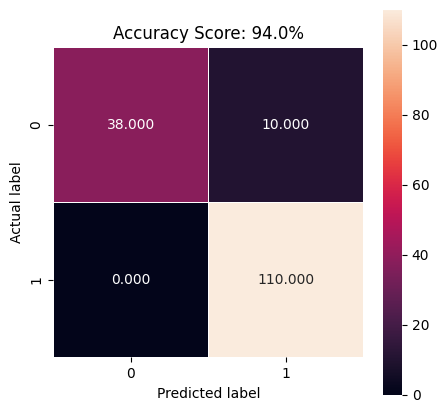

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(test_sentiments, predictions)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Confusion matrix:")
all_sample_title = 'Accuracy Score: {0}%'.format(np.round(score,2)*100)
plt.title(all_sample_title, size = 12)

In [46]:
from sklearn.metrics import classification_report
print("Classification report\n")
print(classification_report(test_sentiments, predictions))

Classification report

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        48
           1       0.92      1.00      0.96       110

    accuracy                           0.94       158
   macro avg       0.96      0.90      0.92       158
weighted avg       0.94      0.94      0.93       158



In [47]:
from sklearn import metrics
print('Accuracy:  {:2.2%} '.format(metrics.accuracy_score(test_sentiments, predictions)))
print('Precision: {:2.2%} '.format(metrics.precision_score(test_sentiments, predictions, average='weighted')))
print('Recall:    {:2.2%} '.format(metrics.recall_score(test_sentiments, predictions, average='weighted')))
print('F1 Score:  {:2.2%} '.format(metrics.f1_score(test_sentiments, predictions, average='weighted')))  

Accuracy:  93.67% 
Precision: 94.20% 
Recall:    93.67% 
F1 Score:  93.44% 


## Logistic Regression using TFIDF

In [48]:
# Logistic Regression model on BOW features
lr.fit(tv_train_features,train_sentiments)
# predict using model
predictions = lr.predict(tv_test_features)

In [49]:
score = lr.score(tv_test_features,test_sentiments)
print("Accuracy score:",np.round(score,2)*100,"%")

Accuracy score: 92.0 %


Confusion matrix:


Text(0.5, 1.0, 'Accuracy Score: 92.0%')

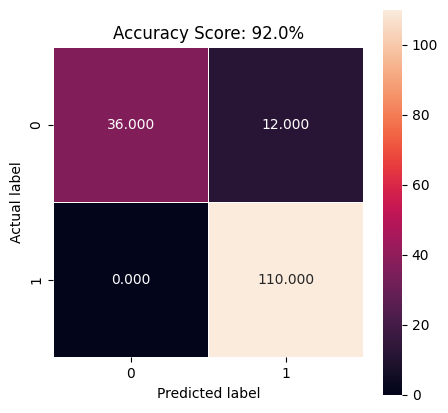

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(test_sentiments, predictions)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Confusion matrix:")
all_sample_title = 'Accuracy Score: {0}%'.format(np.round(score,2)*100)
plt.title(all_sample_title, size = 12)

In [51]:
print("Classification report\n")
print(classification_report(test_sentiments, predictions))

Classification report

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        48
           1       0.90      1.00      0.95       110

    accuracy                           0.92       158
   macro avg       0.95      0.88      0.90       158
weighted avg       0.93      0.92      0.92       158



In [52]:
print('Accuracy:  {:2.2%} '.format(metrics.accuracy_score(test_sentiments, predictions)))
print('Precision: {:2.2%} '.format(metrics.precision_score(test_sentiments, predictions, average='weighted')))
print('Recall:    {:2.2%} '.format(metrics.recall_score(test_sentiments, predictions, average='weighted')))
print('F1 Score:  {:2.2%} '.format(metrics.f1_score(test_sentiments, predictions, average='weighted')))   

Accuracy:  92.41% 
Precision: 93.15% 
Recall:    92.41% 
F1 Score:  92.06% 


## SVM model using BOW

In [53]:
# SVM model on BOW features
svm.fit(cv_train_features,train_sentiments)
# predict using model
predictions = svm.predict(cv_test_features)

In [54]:
score = svm.score(cv_test_features,test_sentiments)
print("Accuracy score:",np.round(score,2)*100,"%")

Accuracy score: 94.0 %


Confusion matrix:


Text(0.5, 1.0, 'Accuracy Score: 94.0%')

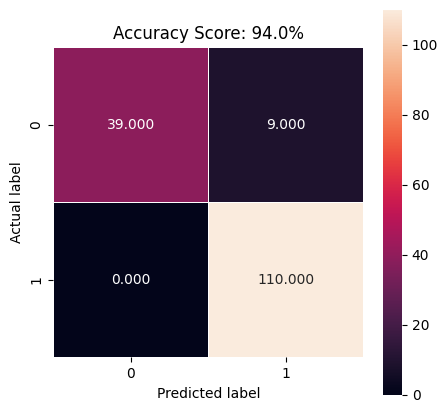

In [55]:
cm = metrics.confusion_matrix(test_sentiments, predictions)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Confusion matrix:")
all_sample_title = 'Accuracy Score: {0}%'.format(np.round(score,2)*100)
plt.title(all_sample_title, size = 12)

In [56]:
print("Classification report\n")
print(classification_report(test_sentiments, predictions))

Classification report

              precision    recall  f1-score   support

           0       1.00      0.81      0.90        48
           1       0.92      1.00      0.96       110

    accuracy                           0.94       158
   macro avg       0.96      0.91      0.93       158
weighted avg       0.95      0.94      0.94       158



In [57]:
print('Accuracy:  {:2.2%} '.format(metrics.accuracy_score(test_sentiments, predictions)))
print('Precision: {:2.2%} '.format(metrics.precision_score(test_sentiments, predictions, average='weighted')))
print('Recall:    {:2.2%} '.format(metrics.recall_score(test_sentiments, predictions, average='weighted')))
print('F1 Score:  {:2.2%} '.format(metrics.f1_score(test_sentiments, predictions, average='weighted')))

Accuracy:  94.30% 
Precision: 94.73% 
Recall:    94.30% 
F1 Score:  94.12% 


## SVM model using TFIDF

In [58]:
# SVM model on TF-IDF features
svm.fit(tv_train_features,train_sentiments)
# predict using model
predictions = svm.predict(tv_test_features) 

In [59]:
score = svm.score(cv_test_features,test_sentiments)
print("Accuracy score:",np.round(score,2)*100,"%")

Accuracy score: 87.0 %


Confusion matrix:


Text(0.5, 1.0, 'Accuracy Score: 87.0%')

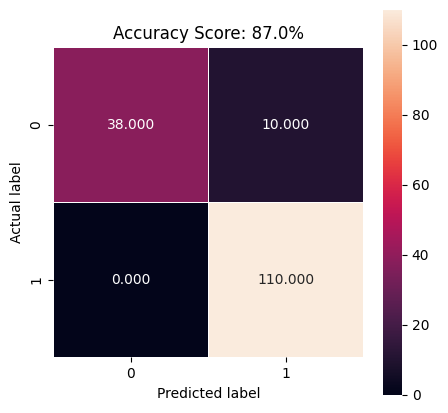

In [60]:
cm = metrics.confusion_matrix(test_sentiments, predictions)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Confusion matrix:")
all_sample_title = 'Accuracy Score: {0}%'.format(np.round(score,2)*100)
plt.title(all_sample_title, size = 12)

In [61]:
print("Classification report\n")
print(classification_report(test_sentiments, predictions))

Classification report

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        48
           1       0.92      1.00      0.96       110

    accuracy                           0.94       158
   macro avg       0.96      0.90      0.92       158
weighted avg       0.94      0.94      0.93       158



In [62]:
print('Accuracy:  {:2.2%} '.format(metrics.accuracy_score(test_sentiments, predictions)))
print('Precision: {:2.2%} '.format(metrics.precision_score(test_sentiments, predictions, average='weighted')))
print('Recall:    {:2.2%} '.format(metrics.recall_score(test_sentiments, predictions, average='weighted')))
print('F1 Score:  {:2.2%} '.format(metrics.f1_score(test_sentiments, predictions, average='weighted')))    

Accuracy:  93.67% 
Precision: 94.20% 
Recall:    93.67% 
F1 Score:  93.44% 
